In [1]:
!uv pip install -q \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    scikit-learn==1.7.1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

housing.data.shape

(20640, 8)

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target
)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [ ]:
def get_r_squared(k=9):
    train_score = []
    test_score = []
    models = []

    for neighbors in range(1, k + 1):
        model = KNeighborsRegressor(n_neighbors=neighbors)

        model.fit(X_train, y_train)

        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

        models.append(model)

    return train_score, test_score, models

In [ ]:
train_score, test_score, models = get_r_squared()

In [ ]:
train_score

[1.0,
 0.6980255655672355,
 0.5691893851080985,
 0.495214071212306,
 0.4450438808723586,
 0.4027039579951145,
 0.370615696342977,
 0.3464775541368713,
 0.3256464737781445]

In [ ]:
test_score

[-0.19442814226045568,
 0.05248837739648182,
 0.12091507306226734,
 0.15004555800911934,
 0.14974047514813815,
 0.16054533889822697,
 0.16308632333280093,
 0.16460446008323348,
 0.16440605944584585]

In [ ]:
# Examining performance for k=6
print(f"Training r2 for 6 neighbors: {train_score[5]:.2f}")
print(f"Testing r2 for 6 neighbors: {test_score[5]:.2f}")

Training r2 for 6 neighbors: 0.40
Testing r2 for 6 neighbors: 0.16


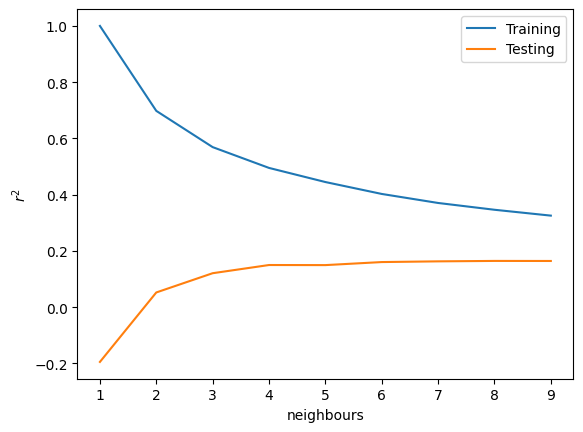

In [ ]:
k = range(1, 10)
plt.plot(k, train_score, label="Training")
plt.plot(k, test_score, label="Testing")
plt.xlabel("neighbours")
plt.ylabel("$r^2$")
plt.legend()
plt.show()

In [ ]:
def get_r_squared_scaled(k=9):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, k + 1):
        model = make_pipeline(
            StandardScaler(), KNeighborsRegressor(n_neighbors=neighbors)
        )
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

In [ ]:
train_score, test_score, models = get_r_squared_scaled()

In [14]:
# Examining performance for k=6
print(f"Training r2 for 6 neighbors: {train_score[5]:.2f}")
print(f"Testing r2 for 6 neighbors: {test_score[5]:.2f}")

Training r2 for 6 neighbors: 0.78
Testing r2 for 6 neighbors: 0.69
